# AirBnB Price Prediction

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso


# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Load the csv Data Files into Dataframe

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Handline Missing Values & Convert Data Type

In [3]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [4]:
# Data types of the Feature
df_train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [5]:
# Find the missing values
print(df_train.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64


In [6]:
df_missing = df_train.filter(['bathrooms', 'first_review', 'last_review', 'host_has_profile_pic', 'host_identity_verified', 
                              'host_response_rate', 'host_since', 'neighbourhood', 'review_scores_rating','zipcode'])
df_missing

,bathrooms,first_review,last_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,neighbourhood,review_scores_rating,zipcode
0,1.5,2015-05-25,2017-01-01,t,t,100%,2015-05-20,Pilsen,97.0,60608
1,2.0,2015-11-09,2015-11-15,t,t,100%,2015-09-08,Echo Park,100.0,90012
2,1.0,2017-05-15,2017-09-25,t,t,100%,2017-05-06,Bushwick,88.0,11237
3,1.0,2012-11-12,2017-07-29,t,t,70%,2009-02-06,Flatiron District,82.0,10010
4,1.0,2017-02-17,2017-03-25,t,t,100%,2015-10-20,NaN,100.0,91766
5,1.0,2016-05-19,2017-09-22,t,f,100%,2016-03-29,Bedford-Stuyvesant,97.0,11221
6,2.0,NaN,NaN,t,f,94%,2016-09-16,Mission Hill,NaN,02130
7,1.0,2016-08-15,2017-03-31,t,f,100%,2014-12-09,Manhattan Beach,95.0,90266
8,1.0,2017-08-05,2017-08-26,t,f,100%,2017-03-07,Kensington,83.0,11218
9,2.0,2017-08-06,2017-09-18,t,t,100%,2014-08-30,Kips Bay,94.0,10016


In [7]:
# Transform object/string Date/Time data to datetime
df_train['first_review'] = pd.to_datetime(df_train['first_review'])
df_train['last_review'] = pd.to_datetime(df_train['last_review'])
df_train['host_since'] = pd.to_datetime(df_train['host_since'])

In [8]:
df_train['host_since_year'] = df_train['host_since'].dt.year
print(round(df_train['host_since_year'].mean(skipna=True)))
df_train['host_since_year'].fillna(round(df_train['host_since_year'].mean()), inplace=True)
# df_train

2014


In [9]:
# Replace NaN with Mean value in bathroom feature / column
df_train['bathrooms'].fillna(round(df_train['bathrooms'].mean()), inplace=True)

In [10]:
# Replace NaN with Mean value in bedrooms feature / column
df_train['bedrooms'].fillna(round(df_train['bedrooms'].mean()), inplace=True)

In [11]:
# Replace NaN with Mean value in bedrooms feature / column
df_train['beds'].fillna(round(df_train['beds'].mean()), inplace=True)

In [12]:
# Replace NaN with Mean value in review_scores_rating feature / column
df_train['review_scores_rating'].fillna(round(df_train['review_scores_rating'].mean()), inplace=True)

In [13]:
# Delete % sign from host_response_rate data and convert the data from object to integer
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%', '')
df_train['host_response_rate'].fillna(0, inplace=True)
# Convert data type to Integer
df_train['host_response_rate'] = df_train['host_response_rate'].astype(int)

# Mean of host_response_rate without considering 0 values 
mean_host_response_rate = round(df_train['host_response_rate'].mean(skipna=True))

# Replace 0 with Mean value
df_train['host_response_rate'].mask(df_train['host_response_rate'] == 0, mean_host_response_rate, inplace=True)

In [14]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['host_identity_verified'].mask(df_train['host_identity_verified'] == "t", "1", inplace=True)
df_train['host_identity_verified'].mask(df_train['host_identity_verified'] == "f", "0", inplace=True)
df_train['host_identity_verified'].fillna(0.0, inplace=True)

# COnvert Data Type to Float
df_train['host_identity_verified'] = df_train['host_identity_verified'].astype(float)

In [15]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['host_has_profile_pic'].mask(df_train['host_has_profile_pic'] == "t", "1", inplace=True)
df_train['host_has_profile_pic'].mask(df_train['host_has_profile_pic'] == "f", "0", inplace=True)
df_train['host_has_profile_pic'].fillna(0.0, inplace=True)

# Convert Data Type to Float
df_train['host_has_profile_pic'] = df_train['host_has_profile_pic'].astype(float)

In [16]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['instant_bookable'].mask(df_train['instant_bookable'] == "t", "1", inplace=True)
df_train['instant_bookable'].mask(df_train['instant_bookable'] == "f", "0", inplace=True)

# Convert Data Type to Float
df_train['instant_bookable'] = df_train['instant_bookable'].astype(int)

In [17]:
df_train['room_type'].value_counts()

Entire home/apt    28367
Private room       21125
Shared room         1508
Name: room_type, dtype: int64

In [18]:
df_test['room_type'].value_counts()

Entire home/apt    12943
Private room        9513
Shared room          655
Name: room_type, dtype: int64

In [19]:
df_train.groupby(by='room_type')['log_price'].mean()

room_type
Entire home/apt    5.162861
Private room       4.327570
Shared room        3.871713
Name: log_price, dtype: float64

In [20]:
# Find the missing values
print(df_train.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating          0
thumbnail_url              5629
zipcode                     645
bedrooms                      0
beds                          0
host_since_year               0
dtype: int64


# Feature Re-Engineering

In [21]:
#List unique values of a Feature / Column
# df_train['zipcode'].value_counts()

In [22]:
# Create new features from city
df_city = pd.get_dummies(df_train['city'])
df_train = pd.concat([df_train, df_city], axis=1)

In [23]:
# Create new features from property_type
df_property_type = pd.get_dummies(df_train['property_type'])
df_train = pd.concat([df_train, df_property_type], axis=1)

In [24]:
# Create new features from bed_type
df_bed_type = pd.get_dummies(df_train['bed_type'])
df_train = pd.concat([df_train, df_bed_type], axis=1)

In [25]:
# Create new features from room_type
df_room_type = pd.get_dummies(df_train['room_type'])
df_train = pd.concat([df_train, df_room_type], axis=1)

In [26]:
df_train['family'] = np.where(df_train['amenities'].str.contains("Family")==True, '1', '0')
df_train['family'] = df_train['family'].astype(int)

In [27]:
df_train['pets'] = np.where(df_train['amenities'].str.contains("Pets allowed")==True, '1', '0')
df_train['pets'] = df_train['pets'].astype(int)

In [28]:
df_train['event'] = np.where(df_train['amenities'].str.contains("Suitable for events")==True, '1', '0')
df_train['event'] = df_train['event'].astype(int)

In [29]:
df_train['kitchen'] = np.where(df_train['amenities'].str.contains("Kitchen")==True, '1', '0')
df_train['kitchen'] = df_train['kitchen'].astype(int)

In [30]:
df_train['heating'] = np.where(df_train['amenities'].str.contains("Heating")==True, '1', '0')
df_train['heating'] = df_train['heating'].astype(int)

In [31]:
df_train['gym'] = np.where(df_train['amenities'].str.contains("Gym")==True, '1', '0')
df_train['gym'] = df_train['gym'].astype(int)

In [32]:
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Real Bed,Entire home/apt,Private room,Shared room,family,pets,event,kitchen,heating,gym
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,1,0,1,0,1,0,1,1,1,1
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,1,1,0,0,1,0,0,1,1,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,1,0,0,1,1,1,1,1,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,1,1,0,0,1,0,0,1,1,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,1,0,1,0,1,0,0,0,1,0


In [33]:
df_train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'host_since_year', 'Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF',
       'Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow',
       'Cabin', 'Camper/RV', 'Castle', 'Cave', 'Chalet', 'Condominium', 'Dorm',
       'Earth House', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Hut',
       'In-law', 'Island', 'Lighthouse', 'Loft', 'Other', 'Serviced apartment',
       'Tent', 'Timeshare', 'Tipi', 'Townhouse', 'Train', 'Treehouse',
       'Vacation home', 'Villa', 'Yurt', 'Airbed'

In [34]:
# Correlation
df_temp = df_train.filter(['log_price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'Real Bed', 'Shared room', 
                           'Entire home/apt', 'Private room', 'cleaning_fee', 'review_scores_rating', 
                           'host_since_year', 'DC', 'NYC', 'SF', 'c_distance', 'Condominium', 'pets', 'event',
                          'kitchen', 'heating', 'gym'], axis=1)
df_temp.corr()

,log_price,accommodates,bathrooms,bedrooms,beds,Real Bed,Shared room,Entire home/apt,Private room,cleaning_fee,...,host_since_year,DC,NYC,SF,Condominium,pets,event,kitchen,heating,gym
log_price,1.000000,0.566629,0.351540,0.471189,0.443668,0.101532,-0.221476,0.601663,-0.530683,0.113761,...,-0.078245,0.080235,-0.078201,0.165962,0.067837,0.085847,0.115709,0.098320,0.100451,0.110910
accommodates,0.566629,1.000000,0.504534,0.708980,0.812433,0.085655,-0.088625,0.480223,-0.453884,0.184065,...,0.008201,0.047627,-0.136879,0.001952,0.025460,0.130410,0.221129,0.099781,0.102755,0.027158
bathrooms,0.351540,0.504534,1.000000,0.588871,0.521974,0.044440,0.028126,0.138567,-0.149433,0.053028,...,0.006835,0.037508,-0.156371,0.016242,0.030416,0.059758,0.143046,0.070345,0.051052,0.025703
bedrooms,0.471189,0.708980,0.588871,1.000000,0.713256,0.064350,-0.054077,0.250685,-0.234249,0.103452,...,-0.011878,0.017774,-0.106635,0.030814,0.027365,0.085247,0.151038,0.093538,0.067723,-0.031935
beds,0.443668,0.812433,0.521974,0.713256,1.000000,0.071862,-0.000742,0.356869,-0.359688,0.133786,...,0.023399,0.018849,-0.104572,0.002568,0.010257,0.081474,0.173505,0.080612,0.083027,0.000447
Real Bed,0.101532,0.085655,0.044440,0.064350,0.071862,1.000000,-0.206468,0.104206,-0.034102,0.031470,...,0.016869,-0.003683,-0.007475,0.007357,-0.001282,0.008358,0.004610,0.022225,0.021541,0.008564
Shared room,-0.221476,-0.088625,0.028126,-0.054077,-0.000742,-0.206468,1.000000,-0.195420,-0.146784,-0.085009,...,0.050951,-0.003972,-0.022892,-0.026029,-0.014744,-0.029799,0.010081,-0.027160,-0.063203,0.003738
Entire home/apt,0.601663,0.480223,0.138567,0.250685,0.356869,0.104206,-0.195420,1.000000,-0.941413,0.212317,...,-0.072504,0.068616,-0.099961,0.021830,0.024121,0.087557,0.022820,0.144961,0.111798,0.078805
Private room,-0.530683,-0.453884,-0.149433,-0.234249,-0.359688,-0.034102,-0.146784,-0.941413,1.000000,-0.184912,...,0.055608,-0.067841,0.108695,-0.013067,-0.019258,-0.078064,-0.026483,-0.136870,-0.091027,-0.080769
cleaning_fee,0.113761,0.184065,0.053028,0.103452,0.133786,0.031470,-0.085009,0.212317,-0.184912,1.000000,...,-0.093070,-0.050450,-0.056333,0.009764,0.013043,0.020006,-0.000534,0.073541,0.130217,0.003208


In [35]:
# Add external feature in the dataset

In [36]:
#List unique values of a Feature / Column
df_train['city'].value_counts()

NYC        22256
LA         15387
SF          4488
DC          3893
Chicago     2585
Boston      2391
Name: city, dtype: int64

In [37]:
data = [['NYC', 40.71427, -74.00597], ['LA', 34.05223, -118.24368], ['SF', 37.77493, -122.41942], ['DC', 38.89511, -77.03637], 
        ['Chicago', 41.85003, -87.65005],['Boston', 42.35843, -71.05977]]
df_c = pd.DataFrame(data,columns=['City','c_lat', 'c_lon'])
df_c

,City,c_lat,c_lon
0,NYC,40.71427,-74.00597
1,LA,34.05223,-118.24368
2,SF,37.77493,-122.41942
3,DC,38.89511,-77.03637
4,Chicago,41.85003,-87.65005
5,Boston,42.35843,-71.05977


In [38]:
df_merged = pd.merge(left=df_train, right=df_c, how='left', left_on=['city'], right_on=['City'])
df_merged.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Shared room,family,pets,event,kitchen,heating,gym,City,c_lat,c_lon
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,1,0,1,1,1,1,Chicago,41.85003,-87.65005
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,1,0,0,1,1,0,LA,34.05223,-118.24368
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,1,1,1,1,1,0,NYC,40.71427,-74.00597
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,1,0,0,1,1,0,NYC,40.71427,-74.00597
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,1,0,0,0,1,0,LA,34.05223,-118.24368
5,16078894,4.836282,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,Real Bed,strict,True,...,0,1,0,0,1,1,0,NYC,40.71427,-74.00597
6,10122015,5.220356,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,2.0,Real Bed,strict,True,...,0,1,1,0,1,1,1,Boston,42.35843,-71.05977
7,13762269,5.686975,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,1.0,Real Bed,moderate,False,...,0,0,0,0,1,1,0,LA,34.05223,-118.24368
8,15174230,3.555348,Apartment,Private room,"{""Wireless Internet"",Kitchen,""Smoke detector"",...",2,1.0,Real Bed,flexible,False,...,0,0,0,0,1,0,0,NYC,40.71427,-74.00597
9,15716280,4.234107,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,2.0,Real Bed,strict,True,...,0,1,0,0,1,1,0,NYC,40.71427,-74.00597


In [39]:
# new_order = ['id', 'log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'SF', 'Real Bed', 'Entire home/apt', 
#              'Private room', 'Shared room', 'city', 'latitude', 'longitude', 'zipcode', 'c_lat', 'c_lon']
df_train = df_merged#[new_order]

In [40]:
# from geopy.distance import geodesic

# # df_train['c_distance'] = geodesic((df_train['latitude'], df_train['longitude']), (df_train['c_lat'], df_train['c_lon'])).miles

# zip_point = (41.849684, -87.676270)
# c_point = (41.85003, -87.65005)
# print(round(geodesic(zip_point, c_point).miles, 2))

# zip_point = 41.849684, -87.676270
# c_point = 41.85003, -87.65005

# df_train['c_distance'] = round(geodesic(zip_point, c_point).miles, 2)

# df_train.head()

In [41]:
import pyproj

geod = pyproj.Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

df_t = geod.inv(41.849684, -87.676270, 41.85003, -87.65005)
print(df_t)
# df_train['c_distance'] = geod.inv(df_train['latitude'], df_train['longitude'], df_train['c_lat'], df_train['c_lon'])

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = geod.inv(lon1,lat1,lon2,lat2)
  return dist

#Add/update a column to the data frame with the distances (in metres)
df_train['c_distance'] = Distance(df_train['latitude'].tolist(),df_train['longitude'].tolist(),
                                  df_train['c_lat'].tolist(),df_train['c_lon'].tolist())
df_train.head(10)

(0.031001669256653167, -179.96934404301348, 2928.567346835669)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,family,pets,event,kitchen,heating,gym,City,c_lat,c_lon,c_distance
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,1,0,1,1,1,1,Chicago,41.85003,-87.65005,2177.746448
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,1,0,0,1,1,0,LA,34.05223,-118.24368,1835.239616
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,1,1,1,1,0,NYC,40.71427,-74.00597,7612.447530
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,1,0,0,1,1,0,NYC,40.71427,-74.00597,3433.336713
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,1,0,0,0,1,0,LA,34.05223,-118.24368,47054.911084
5,16078894,4.836282,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,Real Bed,strict,True,...,1,0,0,1,1,0,NYC,40.71427,-74.00597,6760.318460
6,10122015,5.220356,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,2.0,Real Bed,strict,True,...,1,1,0,1,1,1,Boston,42.35843,-71.05977,5278.985802
7,13762269,5.686975,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,1.0,Real Bed,moderate,False,...,0,0,0,1,1,0,LA,34.05223,-118.24368,23407.871438
8,15174230,3.555348,Apartment,Private room,"{""Wireless Internet"",Kitchen,""Smoke detector"",...",2,1.0,Real Bed,flexible,False,...,0,0,0,1,0,0,NYC,40.71427,-74.00597,9165.943774
9,15716280,4.234107,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,2.0,Real Bed,strict,True,...,1,0,0,1,1,0,NYC,40.71427,-74.00597,3863.573908


In [42]:
# df_train['c_distance'] = round(df_train['c_distance'], 2)

In [43]:
# Correlation
df_temp = df_train.filter(['id', 'log_price', 'c_distance', 'family'], axis=1)
df_temp.corr()

,id,log_price,c_distance,family
id,1.000000,-0.006949,0.001922,-0.001977
log_price,-0.006949,1.000000,-0.127762,0.287761
c_distance,0.001922,-0.127762,1.000000,0.065776
family,-0.001977,0.287761,0.065776,1.000000


# Experiment

In [44]:
# select the columns
# X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'Real Bed', 'Shared room', 'Entire home/apt', 
             'Private room', 'cleaning_fee', 'review_scores_rating', 'host_since_year', 'DC', 'NYC','SF', 'c_distance', 
             'family', 'event', 'kitchen', 'heating', 'gym']
#  
# 'id',  Futon', 'Condominium', 
# X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee']
y_column = ['log_price']

In [45]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 20)
y_train (40800, 1)
X_test (10200, 20)
y_test (10200, 1)


In [46]:
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
#     plt.scatter(y_test, y_pred, alpha=0.3)
#     plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
#     plt.title(model_name)
#     plt.xlabel('True Value')
#     plt.ylabel('Predict Value')
#     plt.xlim([0, 5000000])
#     plt.ylim([0, 5000000])
#     plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
# run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
# run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
# run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
# run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
# run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
# run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)
# run_experiment('Random Forest 200', RandomForestRegressor(200), X_train, y_train, X_test)
# run_experiment('Gradient Boosting', GradientBoostingRegressor(), X_train, y_train, X_test)



# Model Training

In [47]:
# train a linear regression
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Evaluation

RMSE 0.4409


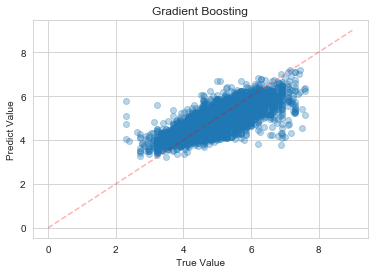

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Gradient Boosting')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

# Prepare submission

In [49]:
df_test['host_since'] = pd.to_datetime(df_test['host_since'])
df_test['host_since_year'] = df_test['host_since'].dt.year

In [50]:
# Create new features from amenities
df_test['family'] = np.where(df_test['amenities'].str.contains("Family")==True, '1', '0')
df_test['family'] = df_test['family'].astype(int)

df_test['event'] = np.where(df_test['amenities'].str.contains("Suitable for events")==True, '1', '0')
df_test['event'] = df_test['event'].astype(int)

df_test['kitchen'] = np.where(df_test['amenities'].str.contains("Kitchen")==True, '1', '0')
df_test['kitchen'] = df_test['kitchen'].astype(int)

df_test['heating'] = np.where(df_test['amenities'].str.contains("Heating")==True, '1', '0')
df_test['heating'] = df_test['heating'].astype(int)

df_test['gym'] = np.where(df_test['amenities'].str.contains("Gym")==True, '1', '0')
df_test['gym'] = df_test['gym'].astype(int)

# Create new features from city
df_city = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_city], axis=1)

# Create new features from property_type
df_property_type = pd.get_dummies(df_test['property_type'])
df_test = pd.concat([df_test, df_property_type], axis=1)

# Create new features from bed_type
df_bed_type = pd.get_dummies(df_test['bed_type'])
df_test = pd.concat([df_test, df_bed_type], axis=1)

# Create new features from room_type
df_room_type = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_room_type], axis=1)

In [51]:
# Add new feature c_distance

df_merged_t = pd.merge(left=df_test, right=df_c, how='left', left_on=['city'], right_on=['City'])
df_test = df_merged_t

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = geod.inv(lon1,lat1,lon2,lat2)
  return dist

#Add/update a column to the data frame with the distances (in metres)
df_test['c_distance'] = Distance(df_test['latitude'].tolist(),df_test['longitude'].tolist(),
                                  df_test['c_lat'].tolist(),df_test['c_lon'].tolist())

In [52]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.184572
1,16436737,4.582427
2,18209634,4.053630
3,15027024,4.164453
4,18074243,5.110640
5,8446914,5.153482
6,19362916,4.269804
7,16116059,5.543780
8,20912583,4.147263
9,13573101,5.182237


In [53]:
df_test[['id', 'log_price']].to_csv('Submission/AirBnB_Submission_2.csv', index=False)